# MNIST Digit Classification using Ensemble Methods

This notebook explores ensemble learning techniques for classifying handwritten digits from the MNIST dataset. We implement and evaluate:

- Bagging (using Decision Trees)
- Random Forest
- AdaBoost
- XGBoost

## Objectives:
- Compare different ensemble classifiers on the same task.
- Observe performance improvements over single decision trees.
- Visualize and analyze classification performance.

In [2]:
# Importing the necessary libraries:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier

# Importing the dataset:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Training shape: {x_train.shape}")
print(f"Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [3]:
# Pre-processing:

# Normalize pixel values:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten 28x28 images into 784-length vectors:
train_2d = x_train.reshape((x_train.shape[0], -1))
test_2d = x_test.reshape((x_test.shape[0], -1))

In [4]:
# Implementing the Bagging Classifier with Decision Tree base:

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(train_2d, y_train)
y_pred_bag = bagging_clf.predict(test_2d)

print("Bagging Classifier Report:")
print(classification_report(y_test, y_pred_bag))
print(f"Bagging Accuracy: {accuracy_score(y_test, y_pred_bag):.2f}")

Bagging Classifier Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.95      0.94      0.95      1010
           4       0.97      0.96      0.96       982
           5       0.94      0.94      0.94       892
           6       0.96      0.96      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.94      0.94      0.94       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Bagging Accuracy: 0.96


In [5]:
# Implementing the Random Forest Classifier:

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(train_2d, y_train)
y_pred_rf = rf_clf.predict(test_2d)

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


Random Forest Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Random Forest Accuracy: 0.97


In [6]:
# Implementing AdaBoost Classifier (with Decision Stumps):

ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)
ada_clf.fit(train_2d, y_train)
y_pred_ada = ada_clf.predict(test_2d)

print("\nAdaBoost Report:")
print(classification_report(y_test, y_pred_ada))
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada):.2f}")


AdaBoost Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       980
           1       0.89      0.87      0.88      1135
           2       0.73      0.72      0.73      1032
           3       0.67      0.64      0.66      1010
           4       0.64      0.76      0.70       982
           5       0.47      0.51      0.49       892
           6       0.81      0.79      0.80       958
           7       0.84      0.73      0.78      1028
           8       0.59      0.78      0.67       974
           9       0.59      0.53      0.56      1009

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

AdaBoost Accuracy: 0.70


In [7]:
# Implementing XGBoost Classifier:

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_clf.fit(train_2d, y_train)
y_pred_xgb = xgb_clf.predict(test_2d)

print("\nXGBoost Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:42:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.93      0.92      0.92      1010
           4       0.93      0.92      0.93       982
           5       0.94      0.91      0.93       892
           6       0.95      0.95      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.92      0.92       974
           9       0.88      0.91      0.90      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

XGBoost Accuracy: 0.94


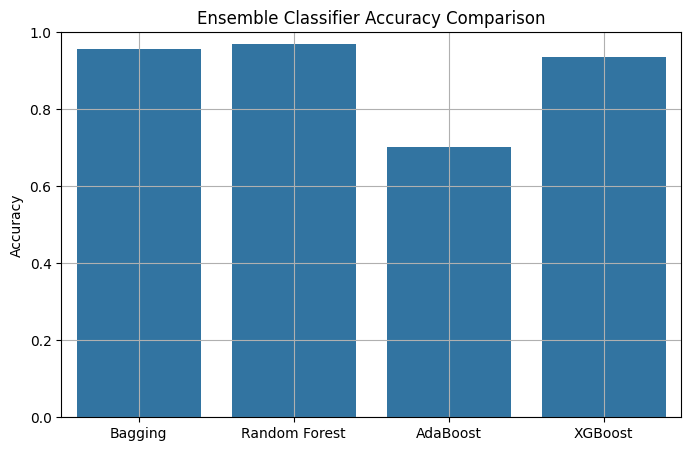

In [8]:
# Accuracy Comparison

models = ['Bagging', 'Random Forest', 'AdaBoost', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_bag),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_ada),
    accuracy_score(y_test, y_pred_xgb)
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies)
plt.title('Ensemble Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()


Best performing model: Random Forest


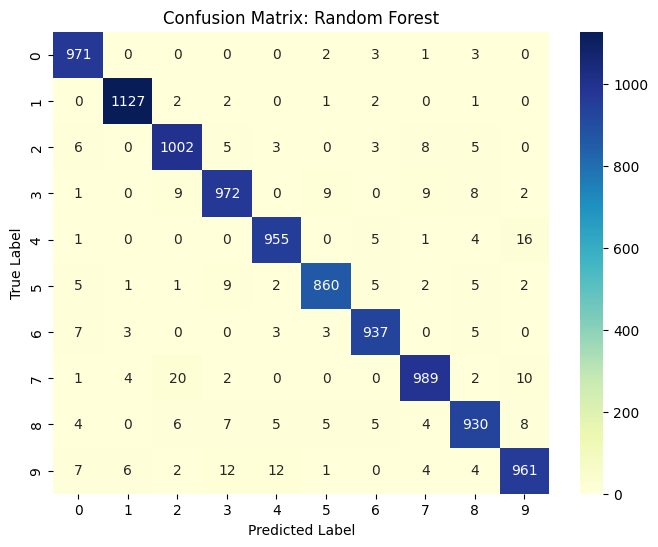

In [9]:
# Identify the best model
best_index = np.argmax(accuracies)
best_model_name = models[best_index]
best_preds = [y_pred_bag, y_pred_rf, y_pred_ada, y_pred_xgb][best_index]

print(f"\nBest performing model: {best_model_name}")

cm = confusion_matrix(y_test, best_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()